In [138]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

# Importing libraries for natural language processing
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
# Get regular expression library
import re

import warnings
from collections import Counter
import datetime
import wordcloud
import json

from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest,chi2
# import operator
from collections import defaultdict

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
us_vids = pd.read_csv('data/USvideos.csv')
in_vids = pd.read_csv('data/INvideos.csv')
ca_vids = pd.read_csv('data/CAvideos.csv')
gb_vids = pd.read_csv('data/GBvideos.csv')
us_reviews = us_vids
# View sample
#us_reviews.head()
in_reviews.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [140]:
# Adding a column called country to each of the above datasets
us_vids['country'] = 'us'
in_vids['country'] = 'in'
ca_vids['country'] = 'ca'
gb_vids['country'] = 'gb'
# Viewing the data
us_vids.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,us
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",us
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,us
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,us
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,us


In [141]:
print('Number of videos by nation are :')
print('US  = ' + str(us_vids.size))
print('India  = ' + str(in_vids.size))
print('Canada  = ' + str(ca_vids.size))
print('Great Britain  = ' + str(gb_vids.size))

frames = [us_vids,in_vids,ca_vids,gb_vids]
all_vids = pd.concat(frames)
print('Number of videos combined are :' + str(all_vids.size))

Number of videos by nation are :
US  = 696133
India  = 634984
Canada  = 694977
Great Britain  = 661572
Number of videos combined are :2687666


In [142]:
# view the all vid
# display(all_vids)
all_vids.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

In [143]:
# Data cleaning
for index,row in all_vids.iterrows():
    # Removing punctuation
    temp = row['description']
    temp = re.sub(r'http\S+', '', str(row['description']))
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(temp)
    all_vids.set_value(index,'description',' '.join(tokens))
#   Treating title of the videos
    tempTitle = row['title']
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(tempTitle)
    all_vids.set_value(index,'title',' '.join(tokens))

/Users/singhjasneet/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/singhjasneet/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [146]:
display(all_vids)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,John Lewis Christmas Ad 2017 MozTheMonster,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,Click here to continue the story and make your...,us
1,1ZAPwfrtAFY,17.14.11,Taylor Swift Ready for It Live SNL,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,Musical guest Taylor Swift performs Ready for ...,us
2,5qpjK5DgCt4,17.14.11,Eminem Walk On Water Audio ft Beyoncé,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Eminem s new track Walk on Water ft Beyoncé is...,us
3,puqaWrEC7tY,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Salford drew 4 4 against the Class of 92 and F...,us
4,d380meD0W0M,17.14.11,Dashcam captures truck s near miss with child ...,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Dashcam captures truck s near miss with child ...,us
5,gHZ1Qz0KiKM,17.14.11,How My Relationship Started,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,HOW MY RELATIONSHIP STARTED n PB Merch n PB Me...,us
6,39idVpFF7NQ,17.14.11,Ed Sheeran Perfect Official Music Video,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,to Ed s channel Ed on nFacebook Website Jason ...,us
7,nc99ccSXST0,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD nPrevious Vlog C...,us
8,jr9QtXwC9vc,17.14.11,Elbow Golden Slumbers John Lewis Advert 2017,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,Golden Slumbers originally by The Beatles and ...,us
9,TUmyygCMMGA,17.14.11,Jennifer Lopez Amor Amor Amor Official Video f...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,Jennifer Lopez ft Wisin Amor Amor Amor Officia...,us


In [147]:
stemmer = SnowballStemmer(language="english", ignore_stopwords = True)
words = stopwords.words('english')
# Stemming the description
all_vids['cleaned_description'] = all_vids['description'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ",str(x)).split() if i not in words]).lower())

# Stemming the title
all_vids['title'] = all_vids['title'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ",str(x)).split() if i not in words]).lower())

In [151]:
display(all_vids.head())
# print(all_vids['title'][0])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,cleaned_description
0,2kyS6SvSYSE,17.14.11,john lewi christma ad mozthemonst,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,Click here to continue the story and make your...,us,click continu stori make monster n befriend no...
1,1ZAPwfrtAFY,17.14.11,taylor swift readi it live snl,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,Musical guest Taylor Swift performs Ready for ...,us,music guest taylor swift perform readi it satu...
2,5qpjK5DgCt4,17.14.11,eminem walk on water audio ft beyonc,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Eminem s new track Walk on Water ft Beyoncé is...,us,eminem new track walk water ft beyonc avail ev...
3,puqaWrEC7tY,17.14.11,goal salford citi vs class friend the peninsul...,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Salford drew 4 4 against the Class of 92 and F...,us,salford drew class friend newli open the penin...
4,d380meD0W0M,17.14.11,dashcam captur truck near miss child norway,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Dashcam captures truck s near miss with child ...,us,dashcam captur truck near miss child norway nt...


Description - Uni and Bi-grams based on the TF-IDF Weight


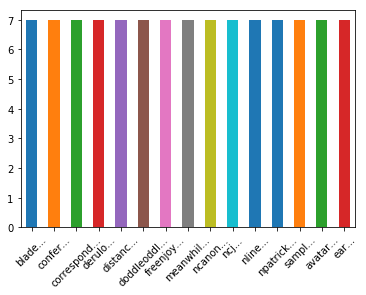

1-gram top: [['blade', 6.98704041737968], ['confer', 6.98704041737968], ['correspond', 6.98704041737968], ['derulo', 6.98704041737968], ['distanc', 6.98704041737968], ['doddleoddl', 6.98704041737968], ['freenjoy', 6.98704041737968], ['meanwhil', 6.98704041737968], ['ncanon', 6.98704041737968], ['ncj', 6.98704041737968], ['nline', 6.98704041737968], ['npatrick', 6.98704041737968], ['sampl', 6.98704041737968], ['avatar', 6.984524692782433], ['ear', 6.984524692782433]]


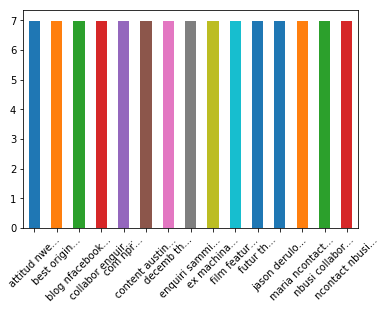

2-gram top: [['attitud nwe', 6.98704041737968], ['best origin', 6.98704041737968], ['blog nfacebook', 6.98704041737968], ['collabor enquiri', 6.98704041737968], ['com npr', 6.98704041737968], ['content austin', 6.98704041737968], ['decemb th', 6.98704041737968], ['enquiri sammi', 6.98704041737968], ['ex machina', 6.98704041737968], ['film featur', 6.98704041737968], ['futur th', 6.98704041737968], ['jason derulo', 6.98704041737968], ['maria ncontact', 6.98704041737968], ['nbusi collabor', 6.98704041737968], ['ncontact nbusi', 6.98704041737968]]


In [157]:
print('Description - Uni and Bi-grams based on the TF-IDF Weight')

index = ['Doc {:d}'.format(i) for i in range(len(all_vids['cleaned_description']))]
# Unigrams
# Create a bag of words using the frequency of words for unigram
vect = TfidfVectorizer(max_df=.5, stop_words='english', ngram_range=(1,2), min_df=0.0025)
X = vect.fit_transform(all_vids['cleaned_description']).todense()
features_by_gram = defaultdict(list)
for f, w in zip(vect.get_feature_names(), vect.idf_):
    features_by_gram[len(f.split(' '))].append([f, w])
    
top_n = 15
fig, ax = plt.subplots()
for gram, features in features_by_gram.items():
    top_features = sorted(features, key=lambda x: x[1], reverse=True)[:top_n]
    featuresDF = pd.DataFrame(top_features, columns=['feature','weight'])
    ax = featuresDF['weight'].plot.bar()
    labels = []
    for item in featuresDF['feature']:
        labels.append(item[:15] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    plt.show()
    print('{}-gram top:'.format(gram), top_features)

Title - Uni and Bi-grams based on the TF-IDF Weight


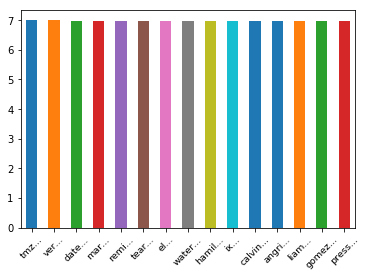

1-gram top: [['tmz', 6.984524692782433], ['ver', 6.984524692782433], ['date', 6.982015281177007], ['mar', 6.982015281177007], ['remi', 6.977015270760301], ['tear', 6.977015270760301], ['el', 6.974524609447849], ['water', 6.972040136120188], ['hamil', 6.967089630960332], ['ix', 6.967089630960332], ['calvin', 6.964623538465138], ['angri', 6.962163512624276], ['liam', 6.962163512624276], ['gomez', 6.9548195383685165], ['press', 6.949953348717344]]


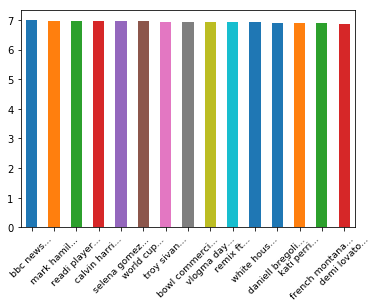

2-gram top: [['bbc news', 6.98704041737968], ['mark hamil', 6.967089630960332], ['readi player', 6.967089630960332], ['calvin harri', 6.964623538465138], ['selena gomez', 6.9548195383685165], ['world cup', 6.9548195383685165], ['troy sivan', 6.9426981778361725], ['bowl commerci', 6.918887529142453], ['vlogma day', 6.918887529142453], ['remix ft', 6.911853502485074], ['white hous', 6.911853502485074], ['daniell bregoli', 6.9071914893792625], ['kati perri', 6.90255110982276], ['french montana', 6.881931822620024], ['demi lovato', 6.868418103453301]]


In [154]:
print('Title - Uni and Bi-grams based on the TF-IDF Weight')

# index = ['Doc {:d}'.format(i) for i in range(len(all_vids['cleaned_description']))]
# Unigrams
# Create a bag of words using the frequency of words for unigram
vect = TfidfVectorizer(max_df=.1, stop_words='english', ngram_range=(1,2), min_df=0.0025)
X = vect.fit_transform(all_vids['title']).todense()
features_by_gram = defaultdict(list)
for f, w in zip(vect.get_feature_names(), vect.idf_):
    features_by_gram[len(f.split(' '))].append([f, w])
    
top_n = 15
fig, ax = plt.subplots()
for gram, features in features_by_gram.items():
    top_features = sorted(features, key=lambda x: x[1], reverse=True)[:top_n]
    featuresDF = pd.DataFrame(top_features, columns=['feature','weight'])
    ax = featuresDF['weight'].plot.bar()
    labels = []
    for item in featuresDF['feature']:
        labels.append(item[:15] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=9.5)
    plt.show()
    print('{}-gram top:'.format(gram), top_features)

In [166]:
most_frequent = all_vids.groupby('channel_title')['channel_title'].agg(
    {"code_count": len}).sort_values(
    "code_count", ascending=False
).head(10).reset_index()
display(most_frequent)

/Users/singhjasneet/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,channel_title,code_count
0,The Late Show with Stephen Colbert,639
1,TheEllenShow,603
2,WWE,594
3,Jimmy Kimmel Live,576
4,The Tonight Show Starring Jimmy Fallon,570
5,Late Night with Seth Meyers,550
6,Netflix,502
7,CNN,487
8,The Late Late Show with James Corden,484
9,ESPN,475


In [177]:
print(len(all_vids[all_vids['channel_title'] ==  'WWE']))

594


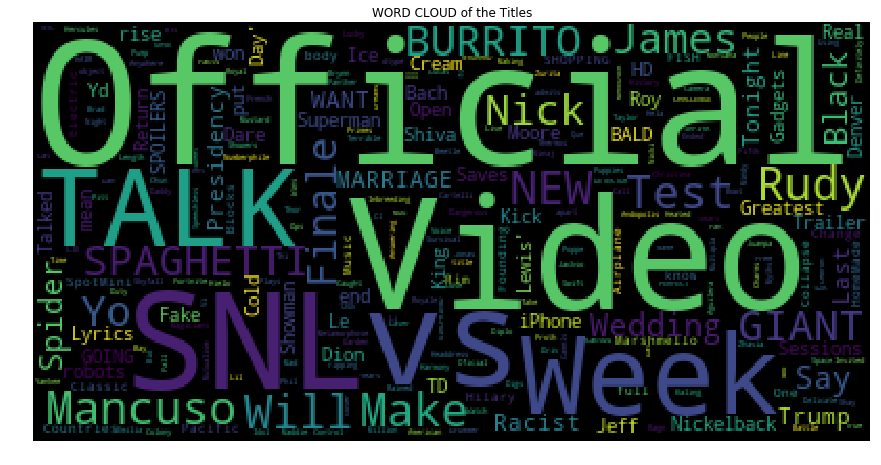

In [3]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                        background_color = 'black',
                        stopwords = stopwords,
                        max_words = 1000,
                        max_font_size = 120,
                        random_state = 42
                     ).generate(str(us_reviews['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD of the Titles")
plt.axis('off')
plt.show()

Text(0.5,1,'Comments diabled')

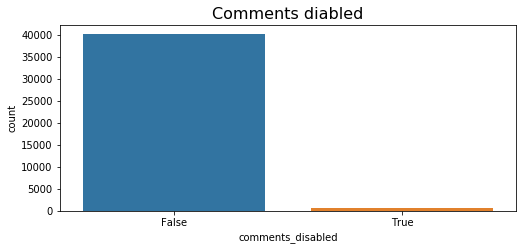

In [12]:
# Videos having comments disabled

plt.figure(figsize = (18,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x= 'comments_disabled',data = us_reviews)
g.set_title("Comments diabled", fontsize = 16)


Text(0.5,1,'Ratings diabled')

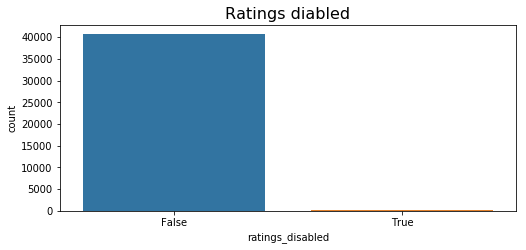

In [11]:
# Videos having Ratings disabled in US

plt.figure(figsize = (18,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x= 'ratings_disabled',data = us_reviews)
g.set_title("Ratings diabled", fontsize = 16)

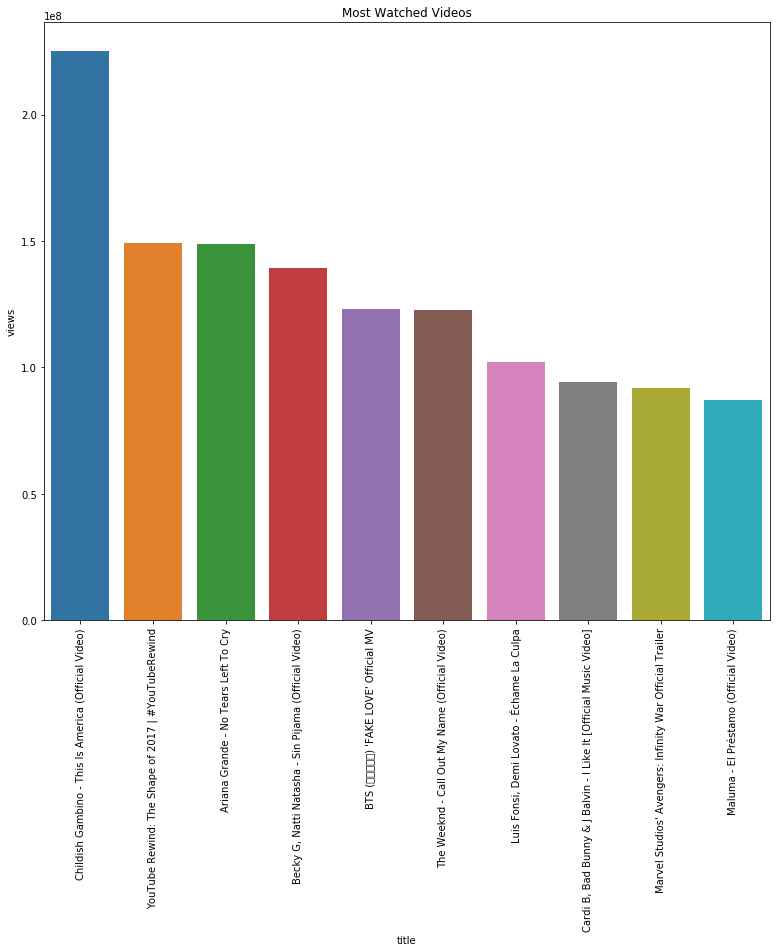

In [30]:
# Most watched videos in United States

sortByViews = us_reviews.sort_values(by="views", ascending = False).drop_duplicates('title', keep = 'first')
sortByViews.head()
x = sortByViews['title'].head(10)
y = sortByViews['views'].head(10)
title = "Most Watched Videos"

plt.figure(figsize = (13,11))
sns.barplot(x = x, y = y)
plt.title(title)
plt.xticks(rotation = 90)
plt.show()

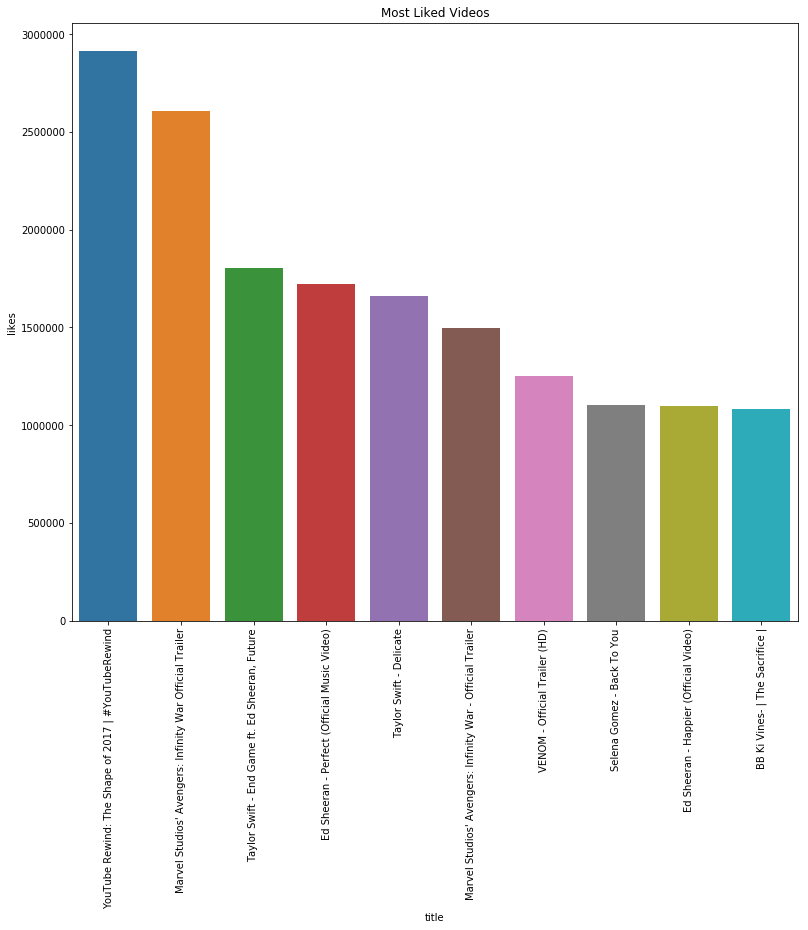

In [31]:
# Most liked videos in United States

sortByLikes = in_reviews.sort_values(by="likes", ascending = False).drop_duplicates('title', keep = 'first')
sortByLikes.head()
x = sortByLikes['title'].head(10)
y = sortByLikes['likes'].head(10)
title = "Most Liked Videos"

plt.figure(figsize = (13,11))
sns.barplot(x = x, y = y)
plt.title(title)
plt.xticks(rotation = 90)
plt.show()

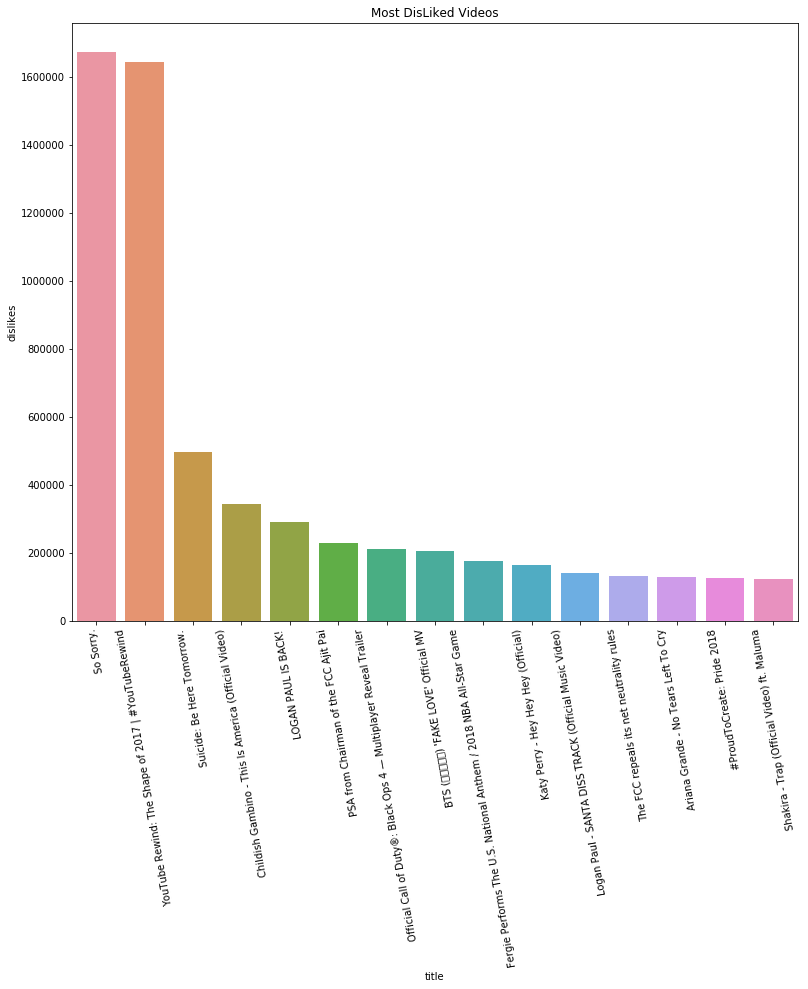

In [38]:
# Most Disliked videos in United States

sortByDislikes = us_reviews.sort_values(by="dislikes", ascending = False).drop_duplicates('title', keep = 'first')
#sortByDislikes.head()
x = sortByDislikes['title'].head(15)
y = sortByDislikes['dislikes'].head(15)
title = "Most DisLiked Videos"

plt.figure(figsize = (13,11))
sns.barplot(x = x, y = y)
plt.title(title)
plt.xticks(rotation = 100)
plt.show()

In [116]:
#my_df_first = us_reviews.reset_index().drop_duplicates('video_id',keep ='first').set_index('video_id')
#diff_first = (us_reviews['trending_date']).astype('datetime64[ns]')
#print(diff_first)
#trendingQuickly = us_reviews[(us_reviews.trending_date - us_reviews.trending_date )  ==1 ]
#trendingQuickly = us_reviews['trending_date'] 
#print(trendingQuickly)

#Channels which took more than a year to make their videos trending

my_df = us_reviews
my_df['trending_date'] = pd.to_datetime(my_df['trending_date'],errors='coerce', format='%y.%d.%m')
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

my_df = my_df[my_df['trending_date'].notnull()]
my_df = my_df[my_df['publish_time'].notnull()]

my_df = my_df.dropna(how='any',inplace=False, axis = 0)

my_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)
my_df['publish_time'] = my_df['publish_time'].dt.time

#my_df_full = my_df.reset_index().sort_values('trending_date').set_index('video_id')

my_df = my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')

my_df.head()


#my_df  = my_df[ (my_df.trending_date).astype('datetime64[ns]') -  (my_df.publish_date).astype('datetime64[ns]')]
diff_first = (my_df['trending_date']).astype('datetime64[ns]')-my_df['publish_date'].astype('datetime64[ns]')
my_df.insert(5, 'dateDifference', diff_first)
#print(diff_first)
#my_df.head()

my_df_temp = my_df

my_df =  my_df[my_df['dateDifference'].astype('timedelta64[D]') > 365]


sortTrendingTime = my_df.sort_values(by="dateDifference", ascending = False)
#sortTrendingTime.head()

display(sortTrendingTime)



,index,trending_date,title,channel_title,publish_date,dateDifference,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,,,
MJO3FmmFuh4,16294,2018-02-05,Budweiser - Original Whazzup? ad,dannotv,2006-07-23,4215 days,24,08:24:11,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,https://i.ytimg.com/vi/MJO3FmmFuh4/default.jpg,False,False,False,"Original Whazzup ad - however, there is a litt..."
UQtt9I6c-YM,11375,2018-01-09,Kramer vs Kramer-Clou Scene,Livia Giustiniani,2008-04-05,3566 days,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50168,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD
wFEAoF7RC7Y,2979,2017-11-28,Behind The Sounds: That's Not Me,BehindTheSounds,2008-06-17,3451 days,10,00:07:56,"Beach|""Boys""|""Brian""|""Wilson""|""Dennis""|""Carl""|...",86897,469,4,106,https://i.ytimg.com/vi/wFEAoF7RC7Y/default.jpg,False,False,False,A video detailing the creative process behind ...
Y8JGfi4MJ8k,2994,2017-11-28,SAOIRSE RONAN - MORONIC (IRONIC),flirppy242,2008-08-07,3400 days,10,12:16:58,"SAOIRSE|""RONAN""|""MORONIC""|""IRONIC""|""IZZIE""|""CO...",26830,79,1,8,https://i.ytimg.com/vi/Y8JGfi4MJ8k/default.jpg,False,False,False,EL NOVIO DE MI MADRE\r\nI COULD NEVER BE A WOMAN
rO_mAQC9bv0,1364,2017-11-20,Amazon.com commercial Xmas 1999Magnetic Whale Art,astroboy1960,2009-03-10,3177 days,1,00:27:20,"amazon|""commerical""|""y2k""|""sing""|""along""|""mitc...",15476,34,1,10,https://i.ytimg.com/vi/rO_mAQC9bv0/default.jpg,False,False,False,IMHO the best of Amazon's Christmas 1999 ads. ...
2vQ_fnlvvr8,6597,2017-12-16,The Smithereens - Blue Period,misleadingsilhouette,2009-06-08,3113 days,10,01:55:32,"smithereens|""Pat""|""DiNizio""|""Jim""|""Babjak""|""Mi...",45096,287,9,59,https://i.ytimg.com/vi/2vQ_fnlvvr8/default.jpg,False,False,False,music video
tYFYoLEO0dM,12993,2018-01-19,The Cranberries - Dreams (Music Video HQ),CrossKut316,2009-09-18,3045 days,10,15:36:33,"The|""Cranberries""|""Dreams""|""(Music""|""Video""|""HQ)""",114105,621,2,45,https://i.ytimg.com/vi/tYFYoLEO0dM/default.jpg,False,False,False,
c_KdAO6MqiM,11562,2018-01-12,TimRollins part1,GrDrtube,2009-09-29,3027 days,27,16:27:28,"Tim|""Rollins""|""K.O.S.""|""Kids""|""of""|""Survival""|...",14289,42,0,8,https://i.ytimg.com/vi/c_KdAO6MqiM/default.jpg,False,False,False,Documentaire in seven parts:Tim Rollins and hi...
-37nIo_tLnk,9983,2018-01-02,Christmas Day 2000,vnbreyes,2009-12-15,2940 days,17,23:26:32,"Christmas|""Day""|""2000""|""Wallace""|""Lakers""|""Bla...",3170,4,0,1,https://i.ytimg.com/vi/-37nIo_tLnk/default.jpg,False,False,False,Rasheed Wallace dropped 33 points and 13 rebou...


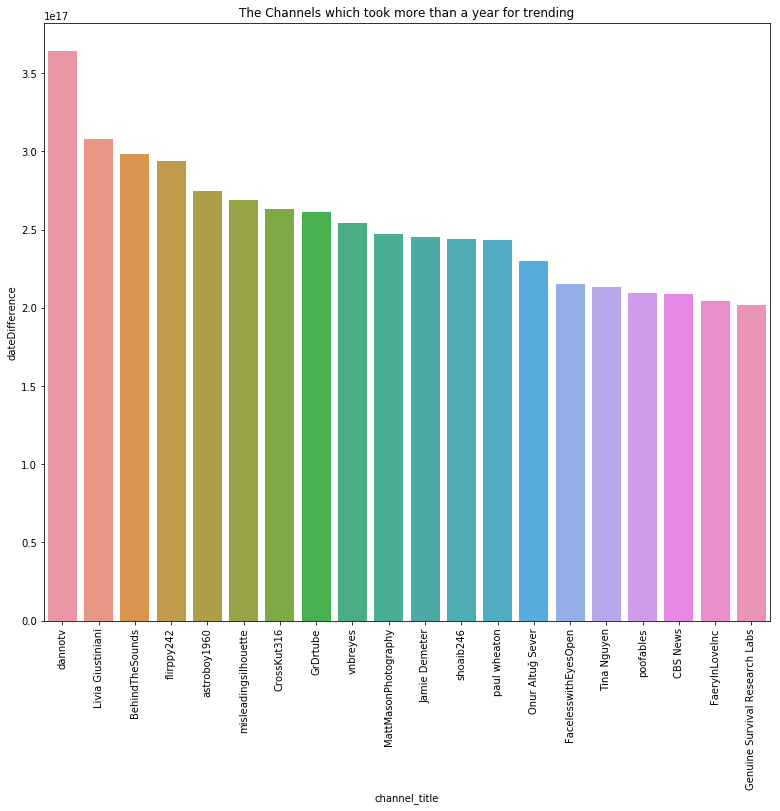

In [117]:
xTrendingTime = sortTrendingTime['channel_title'].head(20)
yTrendingTime = sortTrendingTime['dateDifference'].head(20)
title = "The Channels which took more than a year for trending"

plt.figure(figsize = (13,11))
sns.barplot(x = xTrendingTime, y = yTrendingTime)
plt.title(title)
plt.xticks(rotation = 90)
plt.show()

#my_df.head()
#sortTrendingTime = my_df.sort_values(by="dateDifference", ascending = False)
#sortTrendingTime.head()

In [119]:
#Channel getting its videos trending quickly

display(my_df_temp)
sortTrendingTimeQuickly = my_df_temp.sort_values(by="dateDifference", ascending = True)

,index,trending_date,title,channel_title,publish_date,dateDifference,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,,,
5x1FAiIq_pQ,136,2017-11-14,Alicia Keys - When You Were Gone,Alicia Keys,2017-11-09,5 days,10,15:49:21,[none],95944,1354,181,117,https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg,False,False,False,Find out more in The Vault: http://bit.ly/AK_A...
htvR_dBs3eg,127,2017-11-14,Sam Smith - The Thrill of It All ALBUM REVIEW,theneedledrop,2017-11-10,4 days,10,21:38:57,"album|""review""|""music""|""reviews""|""indie""|""unde...",98422,2926,106,798,https://i.ytimg.com/vi/htvR_dBs3eg/default.jpg,False,False,False,Listen: https://www.youtube.com/watch?v=J_ub7E...
vd4zwINEcLY,139,2017-11-14,Live in the now!,poofables,2011-03-27,2424 days,24,04:31:25,"cash|""Wayne's""|""World""|""wayne""|""waynes""|""fende...",95085,909,52,193,https://i.ytimg.com/vi/vd4zwINEcLY/default.jpg,False,False,False,"Stop torturing yourself man, you'll never affo..."
7fm7mll2qvg,140,2017-11-14,Sigrid - Strangers (Lyric Video),SigridVEVO,2017-11-10,4 days,10,00:00:00,"Sigrid|""Strangers""|""Island""|""Records""|""Pop""",91776,4604,46,357,https://i.ytimg.com/vi/7fm7mll2qvg/default.jpg,False,False,False,Listen to Strangers here: https://Sigrid.lnk.t...
q-WipZ9p0wk,143,2017-11-14,Three meals that cost me $1.50 each,Brothers Green Eats,2017-11-09,5 days,26,14:00:08,"brothers green eats|""budget cooking""|""cooking ...",77630,1991,83,208,https://i.ytimg.com/vi/q-WipZ9p0wk/default.jpg,False,False,False,Welcome to day three of cooking for the price ...
zy0b9e40tK8,144,2017-11-14,Dark | Official Trailer [HD] | Netflix,Netflix,2017-11-09,5 days,24,09:00:07,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...
rL4WkebTT_U,145,2017-11-14,Where is TOKYO'S GREATEST View?,Abroad in Japan,2017-11-09,5 days,24,15:06:34,"tokyo|""japan""|""skytree""|""metropolitan""|""tower""...",151709,9210,71,1103,https://i.ytimg.com/vi/rL4WkebTT_U/default.jpg,False,False,False,Tokyo has some premium romantic views. Let's c...
Y6eKxjMA9ek,146,2017-11-14,"Dropping And CATCHING A Paper Airplane At 2,00...",Tucker Gott,2017-11-09,5 days,24,16:00:09,"paramotor|""tucker""|""gott""|""tucker gott""|""param...",175852,15909,200,852,https://i.ytimg.com/vi/Y6eKxjMA9ek/default.jpg,False,False,False,After failing the paper airplane drop a few ye...
Q6Usd3_fbq8,147,2017-11-14,Improvising in the style of different classica...,Nahre Sol,2017-11-10,4 days,10,04:08:31,"improvise classical music|""improvisation""|""cla...",5149,242,0,54,https://i.ytimg.com/vi/Q6Usd3_fbq8/default.jpg,False,False,False,Here's a video just for fun - I decided to try...


,index,trending_date,title,channel_title,publish_date,dateDifference,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,,,
n6xzsLDzyBk,1208,2017-11-20,Lady Gaga - The Cure (Live at AMA's from Joann...,ladygagaarraza,2017-11-20,0 days,23,02:45:15,"American Music Awards|""AMA""|""Lady Gaga""|""The C...",18916,1425,28,180,https://i.ytimg.com/vi/n6xzsLDzyBk/default.jpg,False,False,False,Lady Gaga performing The Cure live from Joanne...
XJBvP-NZJ9U,3218,2017-11-30,Matt Lauer & Garrison Keillor Accused of Sexua...,Jimmy Kimmel Live,2017-11-30,0 days,23,03:24:39,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",83425,1245,177,218,https://i.ytimg.com/vi/XJBvP-NZJ9U/default.jpg,False,False,False,Jimmy talks about Matt Lauer and Garrison Keil...
jGyUVyp9w9g,1006,2017-11-19,Chance-giving Monologue - SNL,Saturday Night Live,2017-11-19,0 days,24,05:43:25,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",21046,1308,62,206,https://i.ytimg.com/vi/jGyUVyp9w9g/default.jpg,False,False,False,Host Chance the Rapper performs a song about T...
_QufBstcsrc,13410,2018-01-22,Morgan Freeman - Receives Life Achievement SAG...,MrTreknation,2018-01-22,0 days,22,02:27:48,[none],12769,209,11,33,https://i.ytimg.com/vi/_QufBstcsrc/default.jpg,False,False,False,Morgan Freeman Accepts #SAGAwards Life Achieve...
77e7n60Zs9E,13416,2018-01-22,This Is Us: Press Room Q&A | 24th Annual SAG A...,TNT,2018-01-22,0 days,24,03:56:23,"SAG awards|""24th annual SAG awards""|""SAG red c...",2085,35,3,8,https://i.ytimg.com/vi/77e7n60Zs9E/default.jpg,False,False,False,Watch the cast of This Is Us talk about winnin...
T3hXC5yNZOc,20969,2018-03-01,Iggy Azalea - Savior ft. Quavo,iggyazaleamusicVEVO,2018-03-01,0 days,10,05:00:01,"Iggy|""Azalea""|""Savior""|""Island""|""Records""|""Hip...",285984,34129,1625,4219,https://i.ytimg.com/vi/T3hXC5yNZOc/default.jpg,False,False,False,Music video by Iggy Azalea performing Savior. ...
ZYCDNf1a-kY,5212,2017-12-10,James Franco Audience Questions Monologue - SNL,Saturday Night Live,2017-12-10,0 days,24,06:14:05,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",9423,785,17,129,https://i.ytimg.com/vi/ZYCDNf1a-kY/default.jpg,False,False,False,Host James Franco takes questions from audienc...
QS8bma7LRX4,15987,2018-02-04,Natalie's 2nd Rap - SNL,Saturday Night Live,2018-02-04,0 days,24,05:57:36,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",39720,4800,165,530,https://i.ytimg.com/vi/QS8bma7LRX4/default.jpg,False,False,False,Natalie Portman shares what's new in her life....
zkrq7Kpd1so,25551,2018-03-24,ULTRA LIVE presents Ultra Music Festival 2018 ...,UMF TV,2018-03-24,0 days,10,07:55:21,"ultra music festival|""umf""|""mix""|""relive""|""aft...",1648886,0,0,548,https://i.ytimg.com/vi/zkrq7Kpd1so/default.jpg,False,True,False,Tune in here for the Ultra Music Festival 2018...


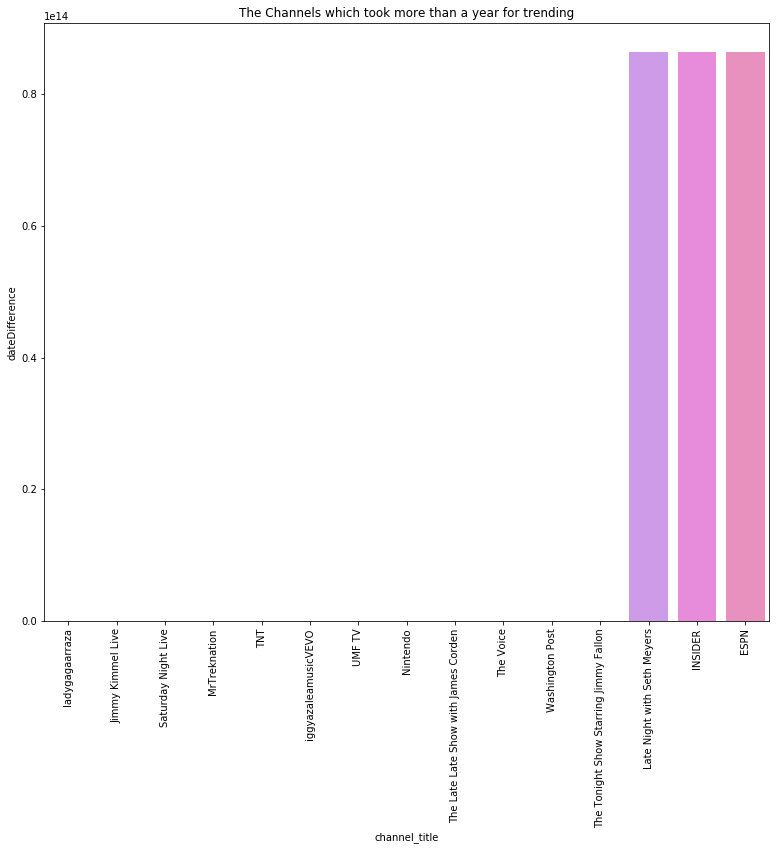

In [121]:
display(sortTrendingTimeQuickly)
xTrendingTimeQuick = sortTrendingTimeQuickly['channel_title'].head(20)
yTrendingTimeQuick = sortTrendingTimeQuickly['dateDifference'].head(20)
title = "The Channels which quickly trending"

plt.figure(figsize = (13,11))
sns.barplot(x = xTrendingTimeQuick, y = yTrendingTimeQuick)
plt.title(title)
plt.xticks(rotation = 90)
plt.show()
